In [12]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

# Data extraction and Preparation

In [13]:
df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Estimation/Batch_Estimation_data.csv", encoding = "ISO-8859-1", error_bad_lines=False)

In [14]:
df.dtypes

UniqueProgramList             object
BusinessFunction              object
ComplexityClass               object
ModuleType                    object
BatchModuleType               object
TotalLOC                       int64
NumberOfGOTO                   int64
NumberOfALTER                  int64
CyclomaticComplexityScore      int64
ComplexityPointForBRE        float64
EstimatedEffortForTRE        float64
EstimatedEffortForBRE        float64
EstimatedEffortForBRD        float64
TotalEffort                  float64
Class                         object
dtype: object

In [15]:
#With high frequency of 'C' , let's impute the 20 null values of BusinessCompexity with 'C"
df['ComplexityClass'].fillna("C", inplace=True)

In [16]:
#STANDARDIZE THE 'BUSINESS COMPLEXITY' VALUES
#Write the following function 
def getComplexityClass(x):
    BC = str(x)
    if (BC in ('C', 'Com-C')):
        output = 'Complex'
    elif (BC in ('VC', 'Com-VC')):
        output = "Very Complex"
    elif (BC in ('M', 'Com-M')):
        output = "Medium"
    elif (BC in ('S')):
        output = "Simple"
    else:
        output = "Not applicable"
        
    return output

In [17]:
#STANDARDIZE THE 'BUSINESS COMPLEXITY' VALUES
df['ComplexityClass'] = df.ComplexityClass.apply(getComplexityClass)

In [18]:
#label encode the data
#Convert all data types to numeric

from sklearn.preprocessing import LabelEncoder
var_mod = ['UniqueProgramList', 'BusinessFunction', 'ComplexityClass', 'ModuleType', 'BatchModuleType', 'TotalLOC', 'NumberOfGOTO', 'NumberOfALTER', 'CyclomaticComplexityScore', 'ComplexityPointForBRE', 'EstimatedEffortForTRE', 'EstimatedEffortForBRE', 'EstimatedEffortForBRD', 'TotalEffort', 'Class']
le = LabelEncoder()
for i in var_mod:
    if df[i].dtypes=='object':
        df[i] = le.fit_transform(df[i])
df.dtypes

UniqueProgramList              int64
BusinessFunction               int64
ComplexityClass                int64
ModuleType                     int64
BatchModuleType                int64
TotalLOC                       int64
NumberOfGOTO                   int64
NumberOfALTER                  int64
CyclomaticComplexityScore      int64
ComplexityPointForBRE        float64
EstimatedEffortForTRE        float64
EstimatedEffortForBRE        float64
EstimatedEffortForBRD        float64
TotalEffort                  float64
Class                          int64
dtype: object

In [36]:
#Backup df
df1=df[['UniqueProgramList', 'BusinessFunction', 'ComplexityClass', 'ModuleType', 'BatchModuleType', 'TotalLOC', 'NumberOfGOTO', 'NumberOfALTER', 'CyclomaticComplexityScore', 'ComplexityPointForBRE', 'EstimatedEffortForTRE', 'EstimatedEffortForBRE', 'EstimatedEffortForBRD', 'TotalEffort', 'Class']]

# Principal component PCA dimensinality reduction

In [19]:
#convert it to numpy arrays
X=df.values

In [20]:
#Scaling the values
X = scale(X)

In [22]:
pca = PCA(n_components=9)

In [23]:
pca.fit(X)

PCA(copy=True, n_components=9, whiten=False)

In [24]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [25]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [27]:
print (var1)

[ 37.25  54.87  68.22  78.83  85.11  89.68  93.31  96.14  97.87]


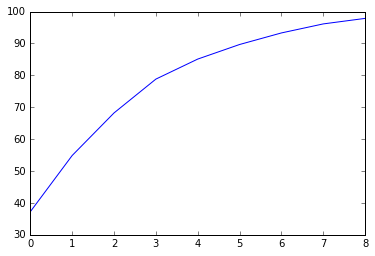

In [28]:
plt.plot(var1)

In [30]:
#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=7)
pca.fit(X)
X1=pca.fit_transform(X)

In [32]:
print (X1)
X1.shape

[[-1.46588346 -1.70472026 -0.49384701 ..., -0.63968037 -0.06933891
   0.34281138]
 [-1.51878738 -1.45888784 -0.34173756 ..., -0.30197283 -0.34578671
   0.76587546]
 [-1.15151952 -1.37331797 -0.76745442 ..., -0.557657   -0.37719354
   0.77035037]
 ..., 
 [-1.18884174 -1.3598025  -0.88444511 ...,  0.09141626 -1.56538209
  -0.38356056]
 [-1.32318837 -1.65235151  1.78450708 ..., -0.66402921 -0.17188381
   0.43598101]
 [-1.54208242 -1.40820311 -0.28907558 ..., -0.24141839 -0.36370394
   0.8996494 ]]


(2101, 7)

# Decision Tree for dimensionality reduction

In [1]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
#define a function which will help us create different models and perform cross-validation.

def modelfit(alg, dtrain, predictors, outcome, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    #dtrain[outcome] = label_binarize(dtrain[outcome], classes=[0, 1])
    alg.fit(dtrain[predictors], dtrain[outcome])
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [3]:

# Create tree object 
#model = tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,  presort=False)
model=tree.DecisionTreeRegressor(random_state=0)
outcome_var = 'EstimatedEffortForTRE'
predictor_var = ['UniqueProgramList', 'BusinessFunction', 'ComplexityClass', 'ModuleType', 'BatchModuleType', 'TotalLOC', 'NumberOfGOTO', 'NumberOfALTER', 'CyclomaticComplexityScore', 'ComplexityPointForBRE']
modelfit(model, df, predictor_var ,outcome_var)

NameError: name 'df1' is not defined

# Random Forest for dimensionality reduction¶

In [ ]:
rfr0 = RandomForestRegressor(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
        random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20) 
outcome_var = 'EstimatedEffortForTRE'
predictor_var = ['UniqueProgramList', 'BusinessFunction', 'ComplexityClass', 'ModuleType', 'BatchModuleType', 'TotalLOC', 'NumberOfGOTO', 'NumberOfALTER', 'CyclomaticComplexityScore', 'ComplexityPointForBRE']
modelfit(rfr0, df, predictor_var ,outcome_var)